In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading the data
data = pd.read_csv('nba.csv')
data.shape
#data.info()
data.head()
data.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking duplicates in field
duplicate = data[data.duplicated()]
duplicate.shape ##no duplicates

(0, 9)

In [6]:
#check for null values 
data.isna().sum()
#get the null row and dropping it 
emptyRow = data.loc[data['Name'].isna()==True]
data = data.drop(457)

In [7]:
data.shape

(457, 9)

In [8]:
data.tail(5)
data.shape
data.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [9]:
#where there is no college, replace with state college
data['College'] = data['College'].replace(np.nan,'State College')

#check for null in college
data['College'].isna().sum() #no nulls

#where salary is O, replace with average salary
meanSal = data.Salary.mean()

data['Salary'] = data['Salary'].replace(np.nan, meanSal)
data.Salary.isna().sum()

#check if there are empty data in the data set
data.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [10]:
#Describe the data
highestPaid = data.loc[data['Salary']==data.Salary.max()]
lowestPaid = data.loc[data['Salary']==data.Salary.min()]

#How many people earn above average salary, below average.
aboveAverageEearners = (data.Salary > meanSal).sum()
aboveAverageEearners
belowAverageEarners = (data.Salary < meanSal).sum()
belowAverageEarners
aboveAverageEearners + belowAverageEarners
#in these average earners, who earns the least

446

In [11]:
#analyse the above average earners, means
upperHalf = data[data.Salary > meanSal]
upperHalf.shape
highestSalUpper = upperHalf.loc[upperHalf['Salary']==upperHalf.Salary.max()]
lowestSalUpper = upperHalf.loc[upperHalf['Salary']==upperHalf.Salary.min()]

In [ ]:
#analyse the below average earners,

In [12]:
data.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,457,457,457.000000,457,457.000000,457,457.000000,457,4.570000e+02
unique,457,30,NaN,5,NaN,18,NaN,119,NaN
top,Willie Reed,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,State College,NaN
freq,1,19,NaN,102,NaN,59,NaN,84,NaN
mean,NaN,NaN,17.678337,NaN,26.938731,NaN,221.522976,NaN,4.842684e+06
std,NaN,NaN,15.966090,NaN,4.404016,NaN,26.368343,NaN,5.165781e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.100602e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.869440e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.331404e+06


In [42]:
#analyse the unique teams...earnigns in each...which team has highest 
#earnings, lowest earning, 
group1 = data.groupby('Team', sort = False)
teams = data['Team'].unique()

grp = group1.get_group(teams[0])

In [48]:
#plot the teams against the average salaries in each team
#getting verage salary in each team
avSalPerGrp = group1['Salary'].aggregate(np.sum)
teams = np.array(teams)
avSalPerGrp = np.array(avSalPerGrp)

30

<BarContainer object of 30 artists>

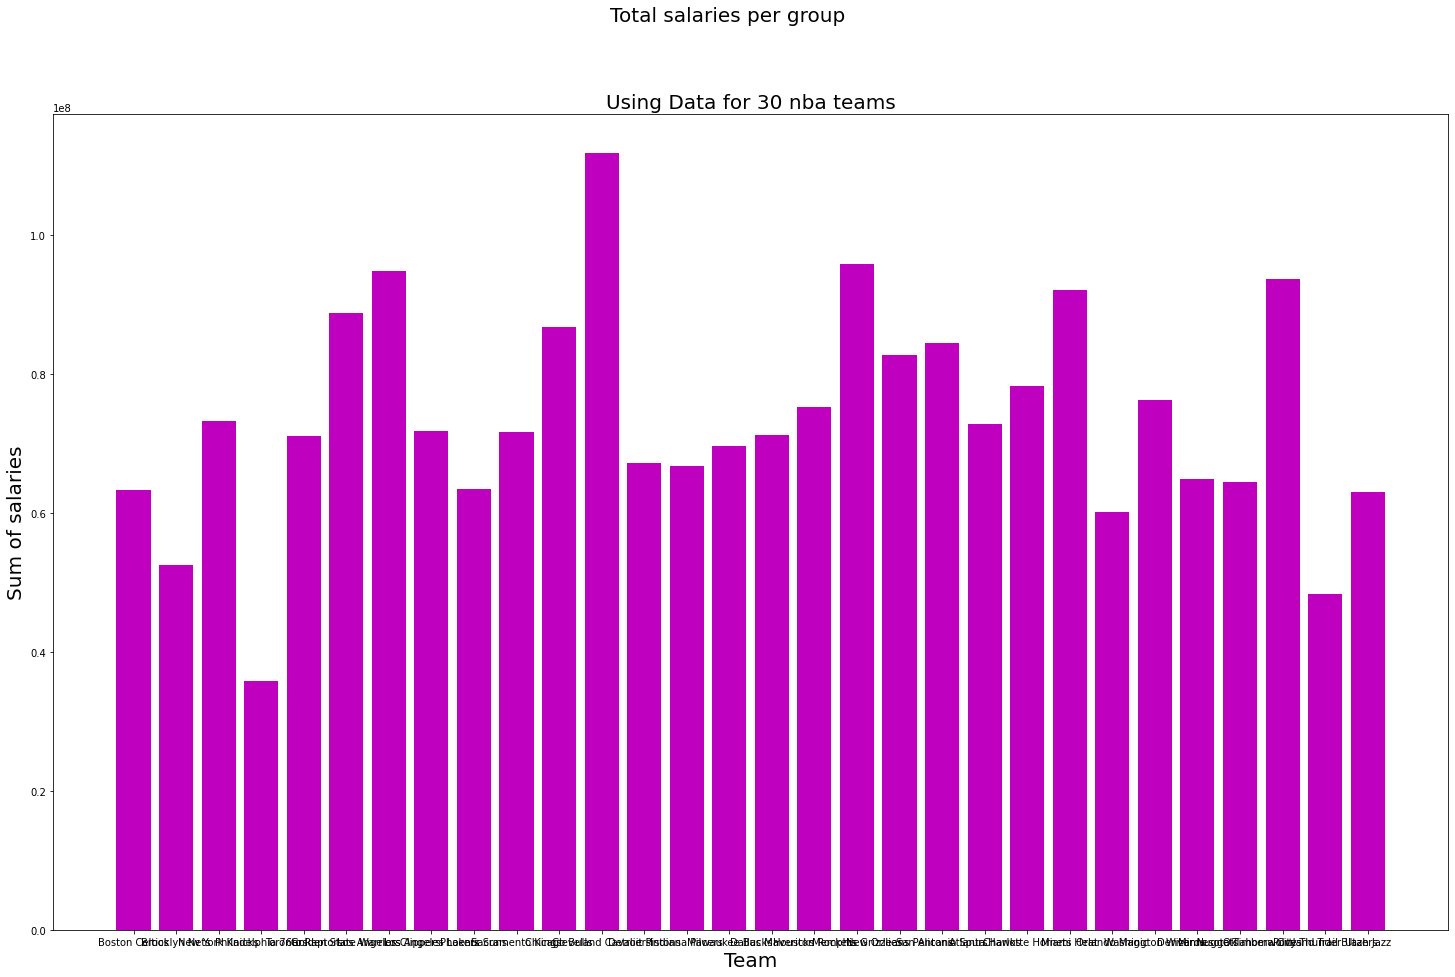

In [50]:
#plotting 
plt.figure(figsize=(25, 15))
plt.suptitle('Total salaries per group', fontsize=20) 
plt.title('Using Data for 30 nba teams', fontsize=20)  
plt.xlabel('Team', fontsize=20) 
plt.ylabel('Sum of salaries', fontsize=20)
plt.bar(teams, avSalPerGrp, color = 'm')